In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
wineDF = pd.DataFrame(wine.data, columns = wine.feature_names)
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
wineDF.shape

(178, 13)

In [5]:
wineDF.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Wine DATA로 KMeans Clustering

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(wineDF)

KMeans(n_clusters=3, random_state=2021)

In [8]:
wineDF['target'] = wine.target #진짜정답
wineDF['cluster'] = kmeans.labels_  #클러스터링결과
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


In [9]:
wineDF.shape

(178, 15)

In [10]:
clustering_result = wineDF.groupby(['target','cluster']).count()
clustering_result.head()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             46          46   46                 46         46   
       1             13          13   13                 13         13   
1      0              1           1    1                  1          1   
       1             20          20   20                 20         20   
       2             50          50   50                 50         50   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   46          46                    46   
       1                   13          13                    13   
1      0                    1           1                     1   
       1                   20          20                    20   
       2                   50          50                    50   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     46               46   46   
       1                     13               13   13   
1      0                      1                1    1   
       1                     20               20   20   
       2                     50               50   50   

                od280/od315_of_diluted_wines  proline  
target cluster                                         
0      0                                  46       46  
       1                                  13       13  
1      0                                   1        1  
       1                                  20       20  
       2                                  50       50

## MinMaxScaler, 2차원으로 축소 후 KMeans Clustering

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine_std = scaler.fit_transform(wine.data)

In [12]:
# 2차원으로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
wine_pca.shape

(178, 2)

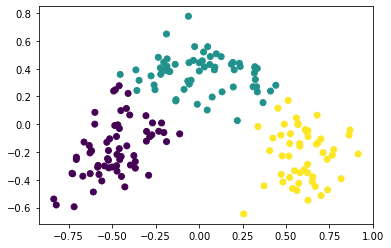

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(wine_pca)
cluster = kmeans.predict(wine_pca)
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=cluster, linewidth=1)
plt.show()

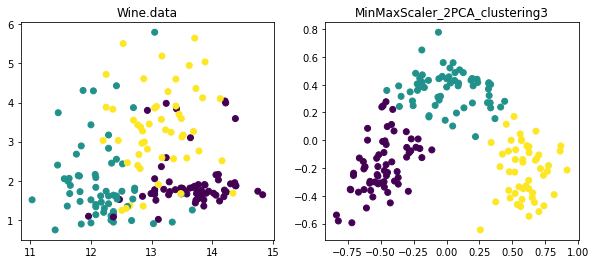

In [14]:
#비교샷
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(wine.data[:,0], wine.data[:,1],c=cluster)
plt.title('Wine.data')

plt.subplot(1, 2, 2)
plt.scatter(wine_pca[:,0], wine_pca[:,1],c=cluster)
plt.title('MinMaxScaler_2PCA_clustering3')
plt.show()


## 실루엣분석

In [15]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [16]:
score_samples = silhouette_samples(wine.data, wineDF.cluster) #각점에서 계수를 구한것
wineDF['실루엣 계수'] = score_samples
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0.516178
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0.482042
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0.684513
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0.593218
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,0.688007


In [17]:
silhouette_score(wine.data, wineDF.cluster)
wineDF.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.555871
1    0.526144
2    0.621967
Name: 실루엣 계수, dtype: float64

In [18]:
best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(wine.data)
    cluster = kmeans.predict(wine.data)
    score = silhouette_score(wine.data, cluster)
    
    print('클러스터의 수 : {}, 실루엣 점수 : {:.4f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.4f}'.format(best_n, best_score))


클러스터의 수 : 2, 실루엣 점수 : 0.6569
클러스터의 수 : 3, 실루엣 점수 : 0.5711
클러스터의 수 : 4, 실루엣 점수 : 0.5631
클러스터의 수 : 5, 실루엣 점수 : 0.5490
클러스터의 수 : 6, 실루엣 점수 : 0.5656
클러스터의 수 : 7, 실루엣 점수 : 0.5616
클러스터의 수 : 8, 실루엣 점수 : 0.5407
클러스터의 수 : 9, 실루엣 점수 : 0.5315
클러스터의 수 : 10, 실루엣 점수 : 0.5213
가장 높은 실루엣 점수를 가진 클러스터 수 : 2, 실루엣 점수 : 0.6569


In [19]:
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features):    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

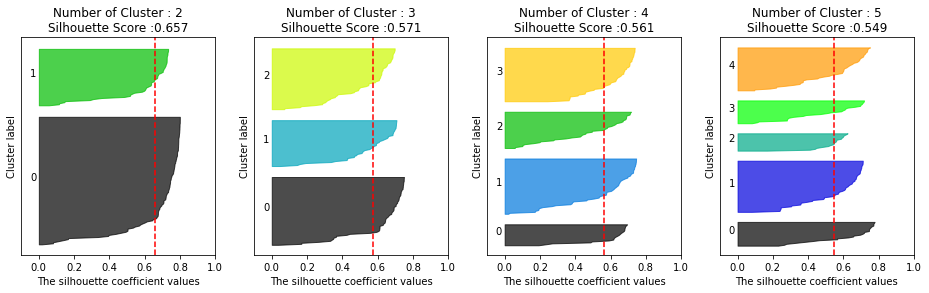

In [20]:
visualize_silhouette([2,3,4,5], wine.data)

## Wine data는 클러스터가 2일때, 실루엣스코어가 가장 높다! 0.657

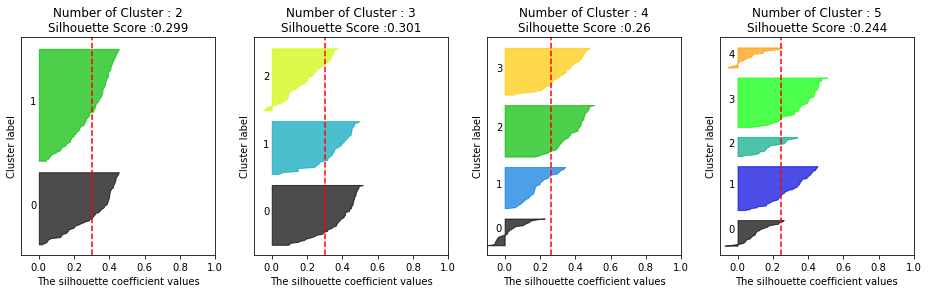

In [21]:
visualize_silhouette([2,3,4,5], wine_std)

## 정규화한 Wine data는 클러스터가 3일때, 실루엣스코아가 가장 높다! 0.031